In [2]:
from utils.tram_models import *
from utils.tram_data import *
from utils.continous import *
from sklearn.model_selection import train_test_split
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


torch.manual_seed(42)

### fit and sample for 1 continous TRAM

### normally distributed

Train size: 8000, Validation size: 1000, Test size: 1000


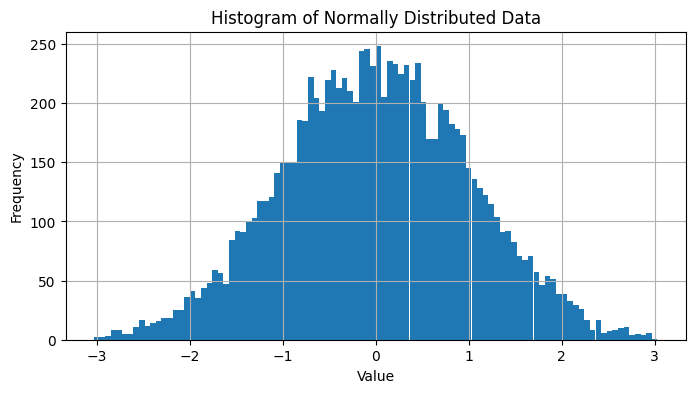

In [3]:
# Generate data

x1 = torch.randn(10_000)
df=pd.DataFrame(x1.numpy(), columns=['x1'])

min_max = np.quantile(x1, [0.05, 0.95])


# train
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
# Validation and test
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

hist = torch.histc(x1, bins=100, min=-3, max=3)
bins = torch.linspace(-3, 3, steps=100)
# Plot
plt.figure(figsize=(8, 4))
plt.bar(bins.numpy(), hist.numpy(), width=0.06, align='center')
plt.title("Histogram of Normally Distributed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()





### Bimodal

Train size: 8000, Validation size: 1000, Test size: 1000


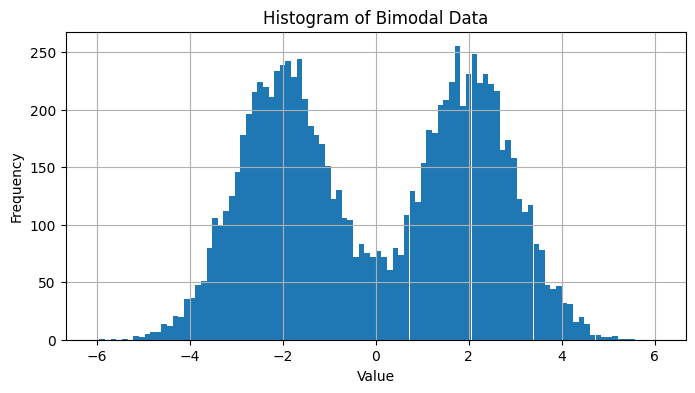

In [3]:


# # Generate bimodal data
# n = 10_000
# x1 = torch.cat([
#     torch.normal(mean=-2.0, std=1.0, size=(n // 2,)),
#     torch.normal(mean=2.0, std=1.0, size=(n // 2,))
# ])

# # Put in DataFrame
# df = pd.DataFrame(x1.numpy(), columns=['x1'])

# # Min-max (5th and 95th percentiles)
# min_max = np.quantile(x1.numpy(), [0.05, 0.95])

# # Split into train, validation, and test sets
# train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
# val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

# # Histogram for visualization
# hist = torch.histc(x1, bins=100, min=-6, max=6)
# bins = torch.linspace(-6, 6, steps=100)

# # Plot the histogram
# plt.figure(figsize=(8, 4))
# plt.bar(bins.numpy(), hist.numpy(), width=0.12, align='center')
# plt.title("Histogram of Bimodal Data")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.grid(True)
# plt.show()


### lognormal

In [4]:
# # Generate right-skewed data using log-normal distribution
# n = 10_000
# mean = 0.0
# std = 0.9
# x1 = torch.distributions.LogNormal(mean, std).sample((n,))

# # Put in DataFrame
# df = pd.DataFrame(x1.numpy(), columns=['x1'])

# # Min-max (5th and 95th percentiles)
# min_max = np.quantile(x1.numpy(), [0.05, 0.95])

# # Split into train, validation, and test sets
# train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
# val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

# # Histogram for visualization
# hist = torch.histc(x1, bins=100, min=0, max=15)
# bins = torch.linspace(0, 15, steps=100)

# # Plot the histogram
# plt.figure(figsize=(8, 4))
# plt.bar(bins.numpy(), hist.numpy(), width=0.15, align='center')
# plt.title("Histogram of Right-Skewed Log-Normal Data")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


### laod data from dev_tabular  /home/bule/TramDag/dev_experiment_logs/continous_4vars_1

Loaded data from /home/bule/TramDag/dev_experiment_logs/continous_4vars_1/continous_4vars_1.csv
Train size: 800, Validation size: 100, Test size: 100


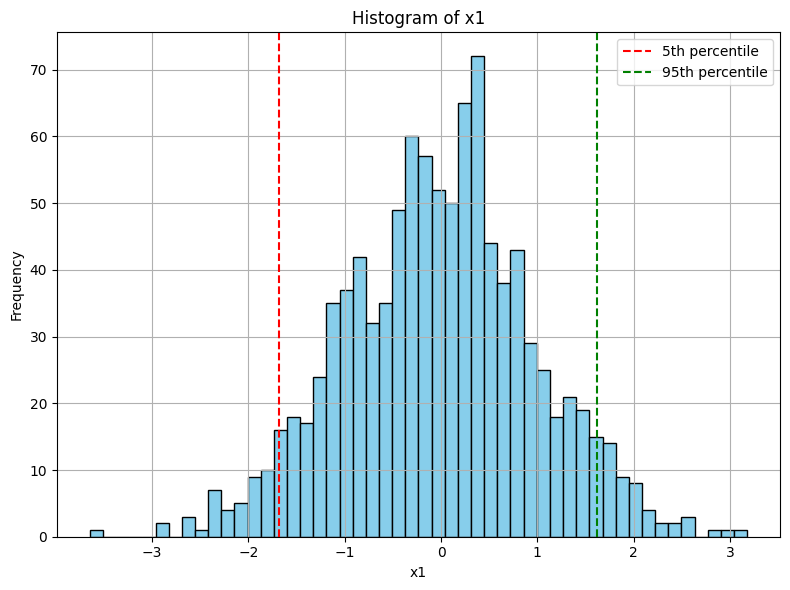

In [ ]:
# experiment_name = "continous_4vars_1"

# LOG_DIR="/home/bule/TramDag/dev_experiment_logs"

# EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
# EXP_DATA_PATH=os.path.join(EXPERIMENT_DIR, f"{experiment_name}.csv")

# df = pd.read_csv(EXP_DATA_PATH)
# print(f"Loaded data from {EXP_DATA_PATH}")


# # Min-max (5th and 95th percentiles)
# min_max = np.quantile(df['x1'], [0.05, 0.95])

# # Split into train, validation, and test sets
# train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
# val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# x1=torch.tensor(df['x1'].to_numpy())

# print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")
# # Histogram for visualization
# # Histogram for x1
# plt.figure(figsize=(8, 6))
# plt.hist(df['x1'], bins=50, color='skyblue', edgecolor='black')
# plt.axvline(min_max[0], color='red', linestyle='--', label='5th percentile')
# plt.axvline(min_max[1], color='green', linestyle='--', label='95th percentile')
# plt.title('Histogram of x1')
# plt.xlabel('x1')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Dataloader

In [4]:
target_col='x1'
batch_size=1024


train_dataset = GenericDataset(train_df, target_col=target_col, conf_dict=None,  transform=None)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

val_dataset = GenericDataset(val_df, target_col=target_col, conf_dict=None,  transform=None)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

test_dataset = GenericDataset(test_df, target_col=target_col, conf_dict=None,  transform=None)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

for x,y in train_loader:
    print(x)
    print(y)
    break

[tensor([1., 1., 1.,  ..., 1., 1., 1.])]
tensor([ 0.1285,  0.5282, -0.0973,  ..., -0.5763, -0.8123,  0.2910])


SI Model

In [5]:
tram_model=TramModel(SimpleIntercept())
tram_model

TramModel(
  (nn_int): SimpleIntercept(
    (fc): Linear(in_features=1, out_features=20, bias=False)
  )
)

Hyperparams

In [6]:
epochs = 700 # set to max epoch , if moedl was trained to 500 eps and you nedd 2000 more set to 700

Train Model

Train with GPU support.
Resuming from previous checkpoint...
Resuming from epoch 700...


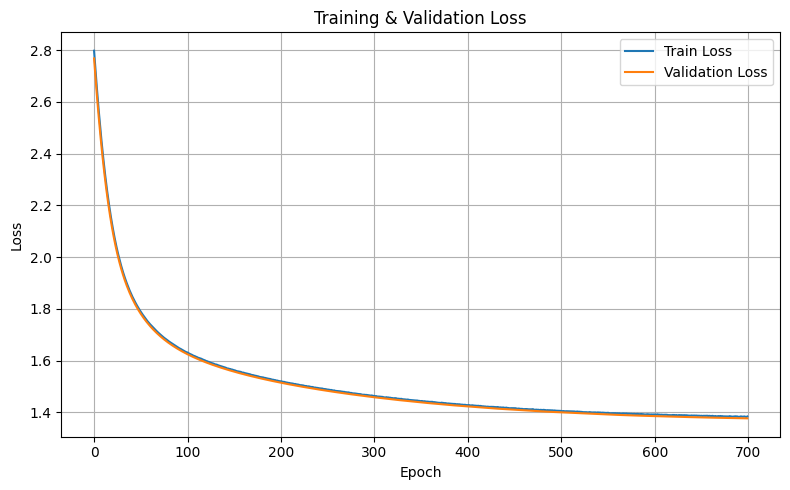

In [7]:
TRAIN_AGAIN = True


experiment = 'x_normal'

DEV_LOG_DIR = '/home/bule/TramDag/dev_experiment_logs'
EXPERIMENT_DIR = os.path.join(DEV_LOG_DIR, experiment)
os.makedirs(EXPERIMENT_DIR, exist_ok=True)

CHECKPOINT_PATH = os.path.join(EXPERIMENT_DIR, f'{experiment}.pt')
HIST_PATH = os.path.join(EXPERIMENT_DIR, f'{experiment}_hist.pt')

start_epoch = 0
train_loss_hist, val_loss_hist = [], []



if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Train with GPU support.")
else:
    device = torch.device('cpu')
    print("No GPU found, train with CPU support.")

optimizer = torch.optim.Adam(tram_model.parameters(), lr=0.001, eps=1e-7, weight_decay=0.0)




if TRAIN_AGAIN:
    # Resume model and history if available
    if os.path.exists(CHECKPOINT_PATH) and os.path.exists(HIST_PATH):
        print("Resuming from previous checkpoint...")
        tram_model.load_state_dict(torch.load(CHECKPOINT_PATH))
        tram_model.to(device)
        tram_model.train()

        history = torch.load(HIST_PATH)
        train_loss_hist = history.get("train", [])
        val_loss_hist = history.get("val", [])
        start_epoch = len(train_loss_hist)
        print(f"Resuming from epoch {start_epoch}...")

    best_val_loss = min(val_loss_hist) if val_loss_hist else float('inf')

    for epoch in range(start_epoch, epochs):
        # === TRAIN ===
        tram_model.train()
        train_loss = 0.0

        for x, y in train_loader:
            x = [xi.to(device) for xi in x]
            y = y.to(device)

            optimizer.zero_grad()
            y_pred = tram_model(int_input=x[0].unsqueeze(1))
            loss = contram_nll(y_pred, y, min_max=min_max)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_loss_hist.append(avg_train_loss)

        # === VALIDATION ===
        tram_model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for x_val, y_val in val_loader:
                x_val = [xi.to(device) for xi in x_val]
                y_val = y_val.to(device)

                y_val_pred = tram_model(int_input=x_val[0].unsqueeze(1))
                loss_val = contram_nll(y_val_pred, y_val, min_max=min_max)
                val_loss += loss_val.item()

        avg_val_loss = val_loss / len(val_loader)
        val_loss_hist.append(avg_val_loss)

        # === SAVE MODEL IF BEST ===
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(tram_model.state_dict(), CHECKPOINT_PATH)
            print(f"✓ Epoch {epoch+1:03d} | Val Loss Improved: {avg_val_loss:.4f} (Saved model)")
        else:
            print(f"Epoch {epoch+1:03d} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

        # === SAVE HISTORY ===
        torch.save({"train": train_loss_hist, "val": val_loss_hist}, HIST_PATH)

else:
    print(" Loading model for evaluation only...")
    tram_model.load_state_dict(torch.load(CHECKPOINT_PATH))
    tram_model.to(device)
    tram_model.eval()

    if os.path.exists(HIST_PATH):
        history = torch.load(HIST_PATH)
        train_loss_hist = history.get("train", [])
        val_loss_hist = history.get("val", [])

# === PLOT LOSSES ===
plt.figure(figsize=(8, 5))
plt.plot(train_loss_hist, label='Train Loss')
plt.plot(val_loss_hist, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Sample from distribution 


1. sample from logistic
2. find xj such that h(xj)-uj=0


In [8]:

for x, y in train_loader:
    x = [xi.to(device) for xi in x] # data ordered as in ordered_parents() 
    outputs = tram_model(int_input=x[0].unsqueeze(1))
    print(x)
    break

[tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0')]


In [9]:
from utils.continous import *


### thetas and shifts

- for source nodes thetas do only depend on 1 therefor are same for each sample

In [10]:
outputs['int_out']

tensor([[-42.0543,   7.7989,  -2.0158,  ...,   6.7306,   5.6608,   8.5715],
        [-42.0543,   7.7989,  -2.0158,  ...,   6.7306,   5.6608,   8.5715],
        [-42.0543,   7.7989,  -2.0158,  ...,   6.7306,   5.6608,   8.5715],
        ...,
        [-42.0543,   7.7989,  -2.0158,  ...,   6.7306,   5.6608,   8.5715],
        [-42.0543,   7.7989,  -2.0158,  ...,   6.7306,   5.6608,   8.5715],
        [-42.0543,   7.7989,  -2.0158,  ...,   6.7306,   5.6608,   8.5715]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [11]:
# transform thetas
thetas=transform_intercepts_continous(outputs['int_out'])
thetas

tensor([[-48.9857, -41.1865, -41.0614,  ...,  45.9778,  51.6421,  60.2137],
        [-48.9857, -41.1865, -41.0614,  ...,  45.9778,  51.6421,  60.2137],
        [-48.9857, -41.1865, -41.0614,  ...,  45.9778,  51.6421,  60.2137],
        ...,
        [-48.9857, -41.1865, -41.0614,  ...,  45.9778,  51.6421,  60.2137],
        [-48.9857, -41.1865, -41.0614,  ...,  45.9778,  51.6421,  60.2137],
        [-48.9857, -41.1865, -41.0614,  ...,  45.9778,  51.6421,  60.2137]],
       device='cuda:0', grad_fn=<SubBackward0>)

### check h_extrapolated_sample

In [12]:
h_extrapolated_with_shift(thetas, targets=x[0], shifts=outputs['shift_out'], k_min=min_max[0], k_max=min_max[1])
# seem to work output is same for all

tensor([1.6813, 1.6813, 1.6813,  ..., 1.6813, 1.6813, 1.6813], device='cuda:0',
       grad_fn=<SqueezeBackward1>)

### sample from stanadrt logistic

In [14]:
from utils.continous import sample_standard_logistic

In [15]:
n = 10_000  # Desired number of latent samples

latent_sample = sample_standard_logistic((n,), device=thetas.device)


theta_single = thetas[0]  # Shape: (20,)
thetas_expanded = theta_single.unsqueeze(0).repeat(n, 1)  # Shape: (n, 20)
shifts = torch.zeros(n, device=thetas.device)

targets = torch.full((n,), 1.0, device=thetas.device)


low = torch.full((n,), -1e5, device=thetas.device)
high = torch.full((n,), 1e5, device=thetas.device)



In [16]:
def vectorized_object_function( thetas: torch.Tensor,targets: torch.Tensor, shifts: torch.Tensor,
                               latent_sample: torch.Tensor, k_min: float, k_max: float) -> torch.Tensor:
    """
    Args:
        t: shape (n,)
    Returns:
        shape (n,)
    """
    return h_extrapolated_with_shift(thetas, targets, shifts, k_min, k_max) - latent_sample


### Bisection


In [17]:
def bisection_root_finder(f, low, high, max_iter=1000, tol=1e-8):
    """
    Pure PyTorch scalar root-finder (element-wise bisection).
    f: function that accepts tensor of shape (n,)
    low, high: tensors of shape (n,)
    Returns: tensor of shape (n,)
    """
    for _ in range(max_iter):
        mid = (low + high) / 2.0
        f_mid = f(mid)
        f_low = f(low)

        # Where sign changes, root is between low and mid; else mid and high
        sign_change = f_low * f_mid < 0
        high = torch.where(sign_change, mid, high)
        low = torch.where(sign_change, low, mid)

        if torch.max(torch.abs(high - low)) < tol:
            break

    return (low + high) / 2.0


In [18]:
root = bisection_root_finder(
    lambda targets: vectorized_object_function(
        thetas_expanded,
        targets,
        shifts,
        latent_sample,
        k_min=min_max[0],
        k_max=min_max[1]
    ),
    low,
    high
)


In [19]:
# check nas 
torch.isnan(root).any()

tensor(False, device='cuda:0')

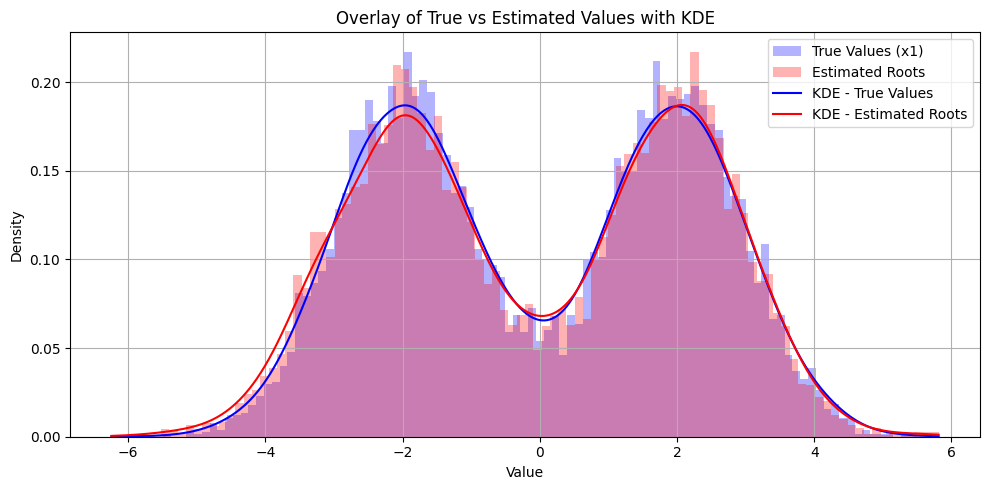

In [17]:
# Convert tensors to NumPy
x1_np = x1.detach().cpu().numpy()
root_np = root.detach().cpu().numpy()

# Filter out NaNs and infs
x1_np = x1_np[np.isfinite(x1_np)]
root_np = root_np[np.isfinite(root_np)]

# Compute KDE
kde_x1 = gaussian_kde(x1_np)
kde_root = gaussian_kde(root_np)

# Create shared x-axis for KDE plot
x_min = min(x1_np.min(), root_np.min())
x_max = max(x1_np.max(), root_np.max())
x_vals = np.linspace(x_min, x_max, 1000)

# Plot
plt.figure(figsize=(10, 5))
plt.hist(x1_np, bins=100, alpha=0.3, label='True Values (x1)', color='blue', density=True)
plt.hist(root_np, bins=100, alpha=0.3, label='Estimated Roots', color='red', density=True)

plt.plot(x_vals, kde_x1(x_vals), color='blue', label='KDE - True Values')
plt.plot(x_vals, kde_root(x_vals), color='red', label='KDE - Estimated Roots')

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Overlay of True vs Estimated Values with KDE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Chandrupta

In [19]:

@torch.no_grad()
def chandrupatla_root_finder(f, low, high, max_iter=100, tol=1e-7):
    a = low.clone()
    b = high.clone()
    fa = f(a)
    fb = f(b)

    if not torch.all(fa * fb < 0):
        raise ValueError("Invalid brackets: fa * fb must be < 0")

    c = a.clone()
    fc = fa.clone()
    d = b - a
    e = d.clone()

    for _ in range(max_iter):
        cond = (fa != fc) & (fb != fc)

        s = torch.where(
            cond,
            a * fb * fc / ((fa - fb) * (fa - fc)) +
            b * fa * fc / ((fb - fa) * (fb - fc)) +
            c * fa * fb / ((fc - fa) * (fc - fb)),
            b - fb * (b - a) / (fb - fa)
        )

        s = torch.clamp(s, torch.min(a, b), torch.max(a, b))
        fs = f(s)

        cond1 = fa * fs < 0

        c.copy_(b)
        fc.copy_(fb)

        a = torch.where(cond1, a, b)
        fa = torch.where(cond1, fa, fb)

        b = s
        fb = fs

        d, e = e, b - a

        if torch.max(torch.abs(b - a)) < tol:
            break

    return b


def root_finding_in_chunks(f_full, low, high, chunk_size=1000, **kwargs):
    results = []
    n = low.shape[0]
    for i in range(0, n, chunk_size):
        l_chunk = low[i:i+chunk_size]
        h_chunk = high[i:i+chunk_size]
        f = lambda x: f_full(x, i)
        roots = chandrupatla_root_finder(f, l_chunk, h_chunk, **kwargs)
        results.append(roots)
    return torch.cat(results)

def vectorized_object_function(thetas, targets, shifts, latent_sample, k_min, k_max):
    return h_extrapolated_with_shift(thetas, targets, shifts, k_min, k_max) - latent_sample

def f_full(targets, chunk_start):
    # slice only the needed chunk of inputs
    chunk_end = chunk_start + targets.shape[0]
    return vectorized_object_function(
        thetas_expanded[chunk_start:chunk_end],
        targets,
        shifts[chunk_start:chunk_end],
        latent_sample[chunk_start:chunk_end],
        k_min=min_max[0],
        k_max=min_max[1]
    )


In [20]:
root = root_finding_in_chunks(
    f_full=f_full,
    low=low,
    high=high,
    chunk_size=10_000,  # adjust as needed for your GPU
    max_iter=1_000,
    tol=1e-7
)

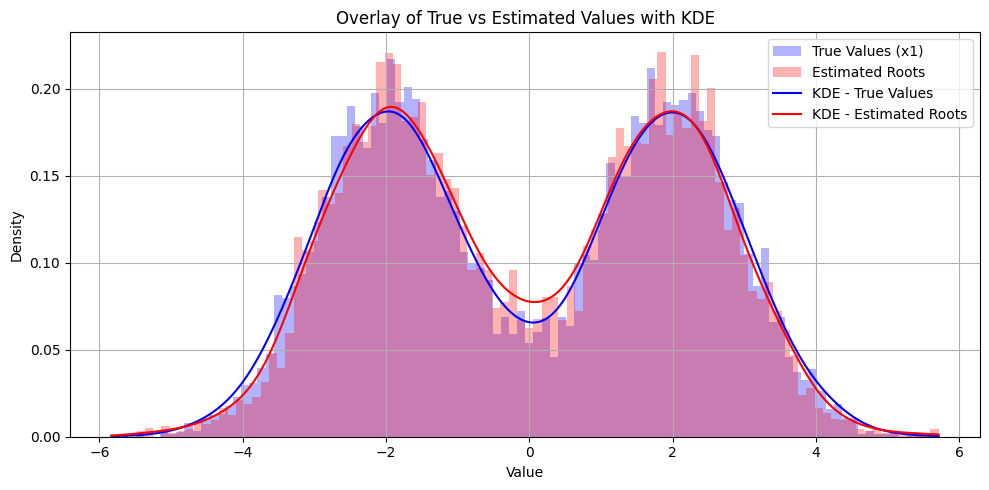

In [21]:
# Convert tensors to NumPy
x1_np = x1.detach().cpu().numpy()
root_np = root.detach().cpu().numpy()

# Filter out NaNs and infs
x1_np = x1_np[np.isfinite(x1_np)]
root_np = root_np[np.isfinite(root_np)]

# Compute KDE
kde_x1 = gaussian_kde(x1_np)
kde_root = gaussian_kde(root_np)

# Create shared x-axis for KDE plot
x_min = min(x1_np.min(), root_np.min())
x_max = max(x1_np.max(), root_np.max())
x_vals = np.linspace(x_min, x_max, 1000)

# Plot
plt.figure(figsize=(10, 5))
plt.hist(x1_np, bins=100, alpha=0.3, label='True Values (x1)', color='blue', density=True)
plt.hist(root_np, bins=100, alpha=0.3, label='Estimated Roots', color='red', density=True)

plt.plot(x_vals, kde_x1(x_vals), color='blue', label='KDE - True Values')
plt.plot(x_vals, kde_root(x_vals), color='red', label='KDE - Estimated Roots')

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Overlay of True vs Estimated Values with KDE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
